In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

世界銀行的資料網址[在此](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)

In [2]:
gdp = pd.read_csv('assets/gdp.csv', skiprows=4) # skiprows 讀取這個文件，前四行不要
gdp.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,...,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,...,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.334016e+11,1.372444e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10,NaN
5,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540183e+10,1.513187e+10,1.826004e+10,NaN
6,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.193513e+09,3.271686e+09,2.789881e+09,2.896610e+09,3.000162e+09,3.218420e+09,3.155149e+09,2.891001e+09,3.329911e+09,NaN
7,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.834607e+12,2.876010e+12,2.518701e+12,2.495865e+12,2.584097e+12,2.785878e+12,2.808100e+12,2.496251e+12,2.850421e+12,NaN
8,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.901075e+11,4.031372e+11,3.581349e+11,3.570452e+11,3.856055e+11,4.222150e+11,4.172156e+11,3.588688e+11,NaN,NaN
9,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,...,5.520251e+11,5.263197e+11,5.947493e+11,5.575314e+11,6.436287e+11,5.248197e+11,4.528184e+11,3.895910e+11,4.914927e+11,NaN


為了做時序分析，因此下面還會示範矩陣轉置。

In [3]:
df = gdp.query('`Country Name` in ["China", "Japan", "United States"]').transpose()
df.columns = df.iloc[0]
df = df[4:-2]
df = df.applymap(lambda x: x / 1e12) # 原本的數據太大，稍微處理遺下數字比較好看，除以10的12次方
df

Country Name,China,Japan,United States
1960,0.059716,0.044307,0.543300
1961,0.050057,0.053509,0.563300
1962,0.047209,0.060723,0.605100
1963,0.050707,0.069498,0.638600
1964,0.059708,0.081749,0.685800
...,...,...,...
2016,11.233277,5.003678,18.695111
2017,12.310409,4.930837,19.479620
2018,13.894818,5.037835,20.527156
2019,14.279938,5.123318,21.372572


[Text(0.5, 0, 'year'), Text(0, 0.5, 'trillion dollars')]

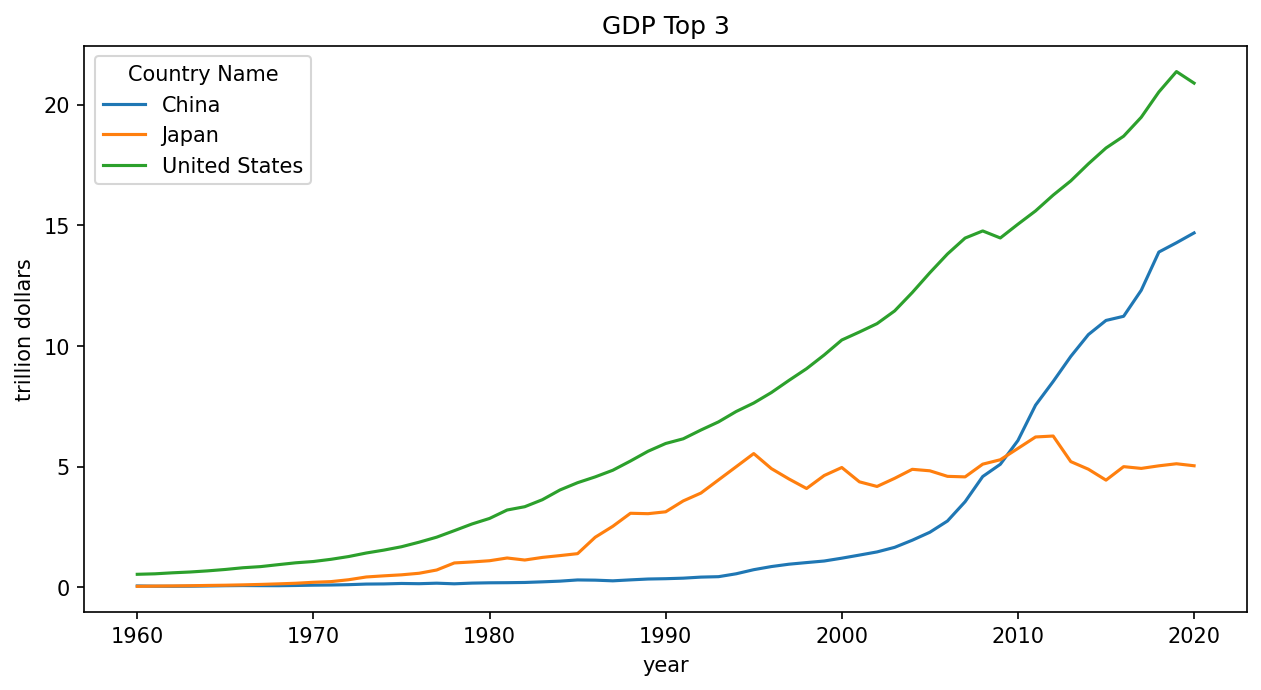

In [4]:
ax = df.plot(figsize=(10, 5), title='GDP Top 3', x_compat=True)
ax.set(xlabel='year', ylabel='trillion dollars') # 設定一個簡單屬性

下面想講做 regression的一個思路，這部份李駿老師參考了知乎上的[一篇文章](https://zhuanlan.zhihu.com/p/54799648)。
這裡我只講一些我們可以直接用的工具。首先我們要導入一批庫，包含 statsmodels裏頭有許多經典統計方式，可以用`%pip install statsmodels` 做安裝。

In [40]:
from datetime import datetime
import numpy as np
from scipy import stats
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace import sarimax

In [6]:
#%pip install statsmodels

In [7]:
# data stationarity test for time series 時序平穩性分析，根據已有的數據去確認是否有規律性
def stationarity_test(ts):
    # rolling mean and std 滑動均值與方差
    rolmean = ts.rolling(4).mean()
    rolstd = ts.rolling(4).std()
    
    # plot the rolling mean and std
    plt.figure(figsize=(12, 4))
    orig = plt.plot(ts, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # ADF, Augmented Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','# Lags Used','Number of Observations used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
               

In [14]:
cn_gdp = df['China']
cn_gdp.index = pd.to_datetime(cn_gdp.index)
cn_gdp.head(10)

1960-01-01    0.059716
1961-01-01    0.050057
1962-01-01    0.047209
1963-01-01    0.050707
1964-01-01    0.059708
1965-01-01    0.070436
1966-01-01    0.076720
1967-01-01    0.072882
1968-01-01    0.070847
1969-01-01    0.079706
Name: China, dtype: float64

以上是典型的時序數據，接下來我們用平滑性分析來做測試。

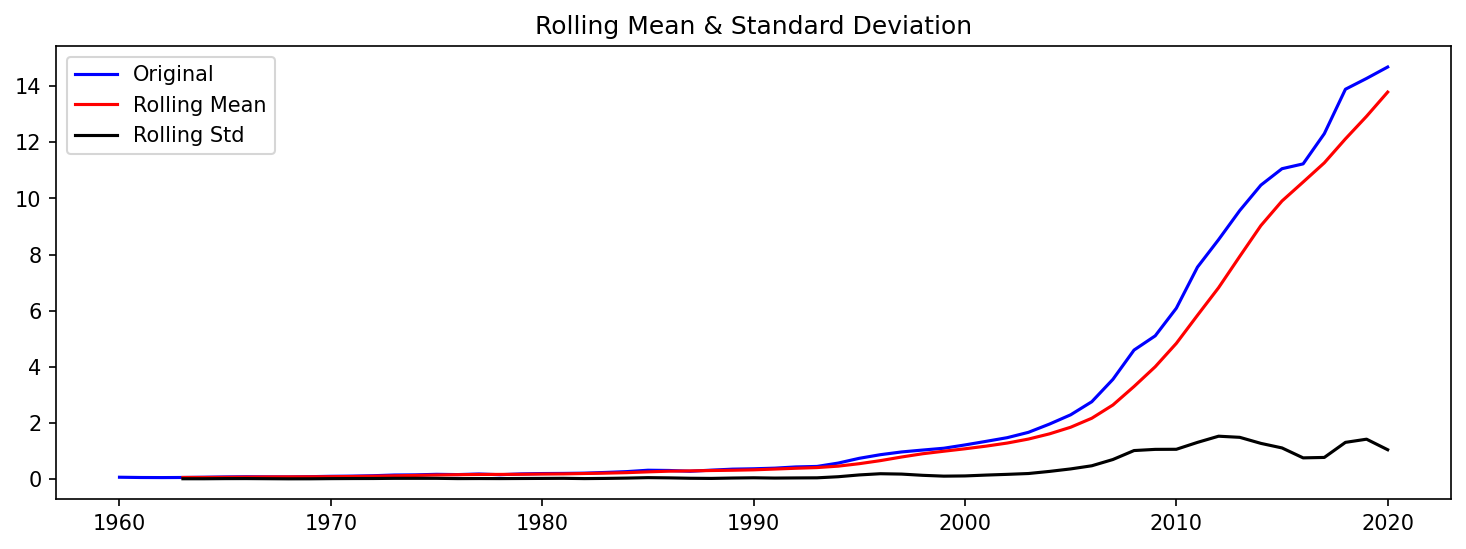

Results of Dickey-Fuller Test:
Test Statistic                  1.460586
p-value                         0.997373
# Lags Used                    11.000000
Number of Observations used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [9]:
stationarity_test(cn_gdp)

接下用取對數再做一次分析(Numpy 支持自然對數)

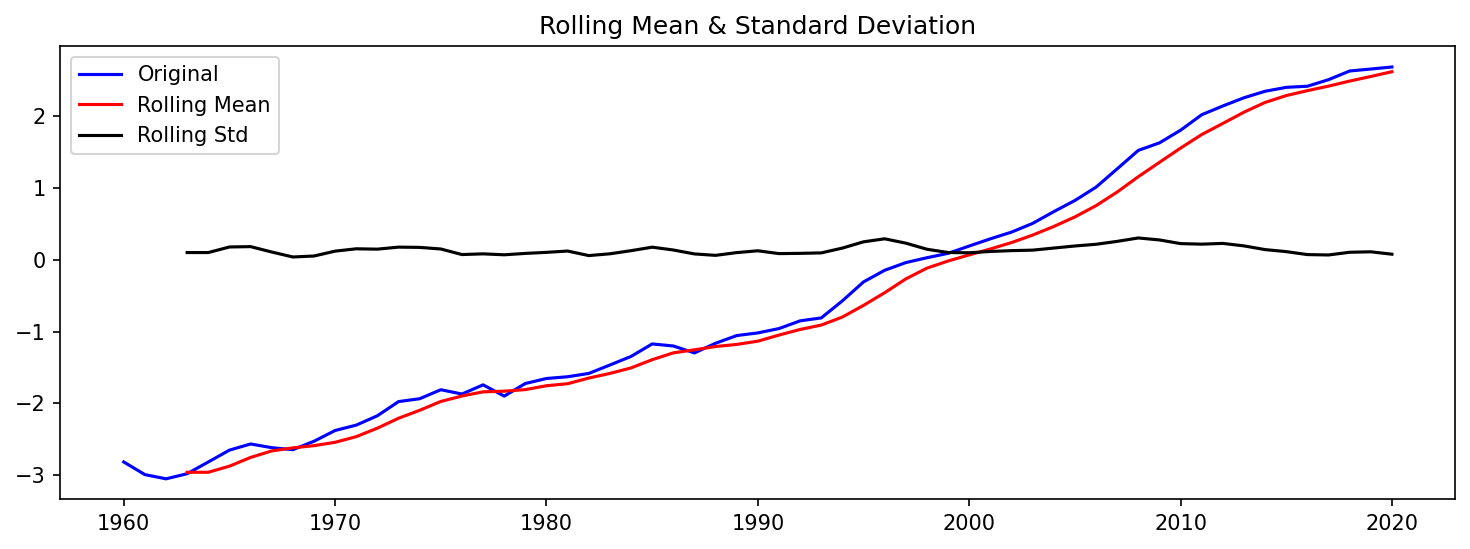

Results of Dickey-Fuller Test:
Test Statistic                  1.856653
p-value                         0.998455
# Lags Used                     0.000000
Number of Observations used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [12]:
cn_gdp_lg = np.log(cn_gdp)
stationarity_test(cn_gdp_lg)

也可以用差分序列，無損於數據，卻能增加穩定性

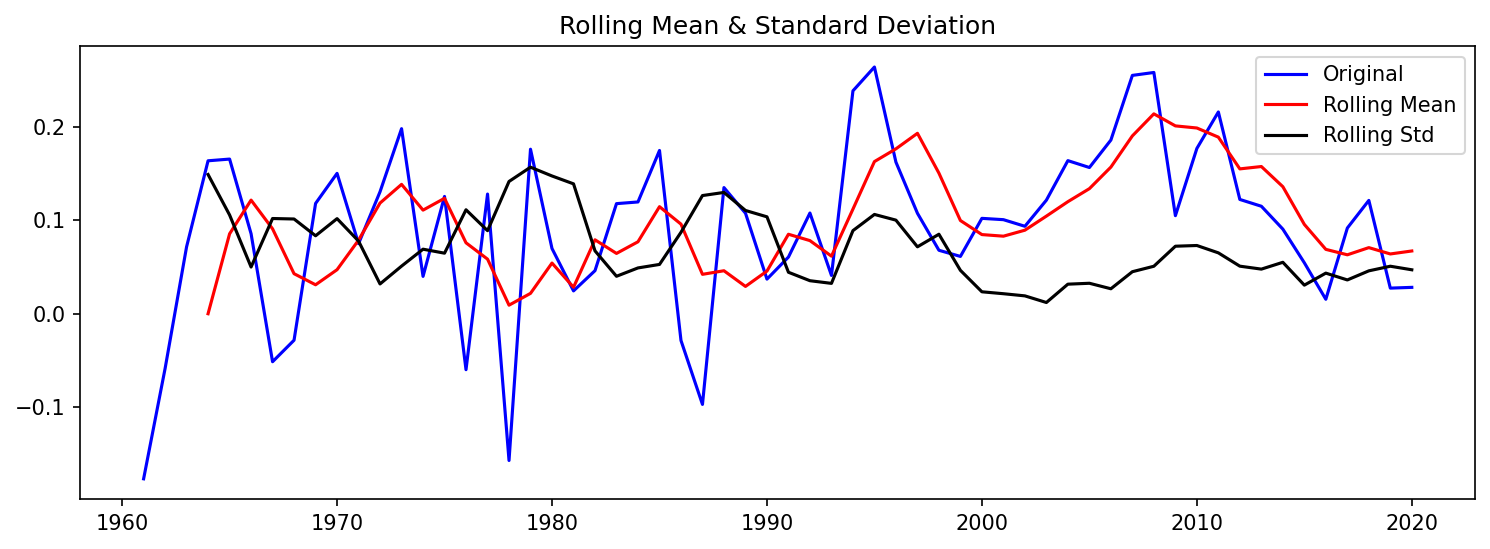

Results of Dickey-Fuller Test:
Test Statistic                -6.174597e+00
p-value                        6.677791e-08
# Lags Used                    0.000000e+00
Number of Observations used    5.900000e+01
Critical Value (1%)           -3.546395e+00
Critical Value (5%)           -2.911939e+00
Critical Value (10%)          -2.593652e+00
dtype: float64


In [16]:
cn_gdp_diff1 = cn_gdp_lg.diff(1)
cn_gdp_diff1.dropna(inplace=True)
stationarity_test(cn_gdp_diff1)

c:\users\tukwa\scoop\apps\python\current\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


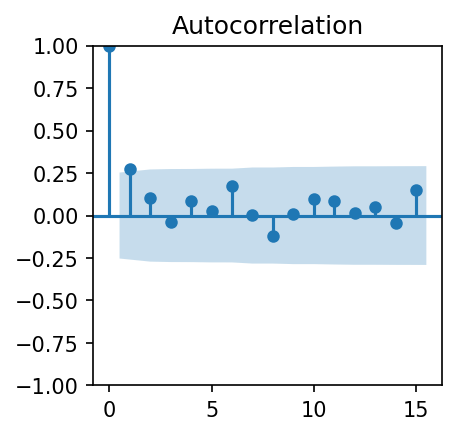

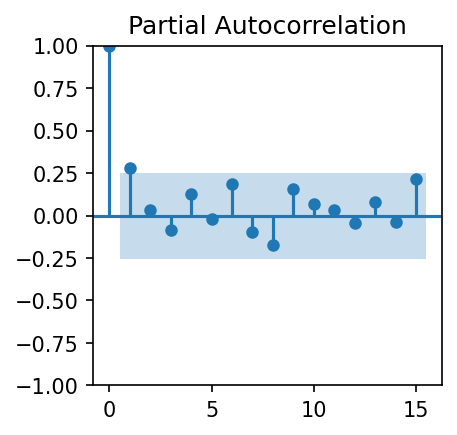

In [17]:
plot_acf(cn_gdp_diff1, lags=15).set_size_inches(3, 3)
plot_pacf(cn_gdp_diff1, lags=15).set_size_inches(3, 3)
plt.show()

以上為數據平穩化示範

由于阶数一般不会很大，在数据量也不大的情况下，暴力定阶是个不错的选择。暴力定阶通过遍历可能的阶数，找到aic, bic, hqic最小的值，作为最优阶数。通过以下语句就可实现，意即用窮舉的運算來幫助我們定階:

In [18]:
import statsmodels.tsa.stattools as st
order = st.arma_order_select_ic(cn_gdp_diff1, max_ar=3, max_ma=3, ic=['aic', 'bic', 'hqic'])
order.bic_min_order

c:\users\tukwa\scoop\apps\python\current\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\tukwa\scoop\apps\python\current\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\tukwa\scoop\apps\python\current\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\tukwa\scoop\apps\python\current\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\tukwa\scoop\apps\python\current\lib\site-packages\statsmodels\base\mod

(1, 0)

In [44]:
model10 = sarimax(cn_gdp_diff1, (1, 0)).fit() # fit方法她會去訓練那個模型
# 改成 sarimax 也不行 1111101

TypeError: 'module' object is not callable

In [27]:
# 當前時間 29:00
#!pip install -U statsmodels

In [26]:
#!python.exe -m pip install --upgrade pip

  Using cached pip-22.3-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
